# Project: AI-generated text detection 🤖
--------------------------------

**Dr. Dave Wanik - (OPIM 5512: Data Science Using Python) AND (OPIM 5509: Introduction to Deep Learning) - University of Connecticut**

Can you predict the 'ind' (0= human, 1 = AI) as a function of the 768 document embeddings, the word count and the punctuation? Be careful - there is imbalanced data which may require some advanced methods in order to get a reasonable model. Can you beat a naive (majority class) model or logistic regression? Now is your time to shine and apply everything you learned.

This project is being given to both classes simultaneously - however, you should only use the methods taught in each class. DS students must use only `sklearn` models, DL students must use `keras` models taught in class. DS students may use `XGBoost()` if they want, but this is at their own risk. `autoML` and `autokeras` may be used to fit models, but students still must be rigorous in their evaluation of the models.

Come to office hours EARLY with any questions that might pop up. See end of notebook for rubric.

* Team Member Names: Chanju Oh, Thao Nguyen, Trang Nguyen
* Group Number: 1
* My best F1 score on the test data was: 0.7368421052631577
* (this must match the output in your script or you are in last place! - use `f1_score(y_test, test_preds)` to check your F1 score)



# Data
* Raw data was download from this website:
  * https://bitgrit.net/competition/19

You can download the data directly from the website, HuskyCT or this gdown link.


In [ ]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from keras import backend as K

In [ ]:
# download data
# https://drive.google.com/file/d/1v4ih6bo-cHpWl9JB1iiMwJk_4gc_GKas/view?usp=sharing
!gdown 1v4ih6bo-cHpWl9JB1iiMwJk_4gc_GKas

Downloading...
From: https://drive.google.com/uc?id=1v4ih6bo-cHpWl9JB1iiMwJk_4gc_GKas
To: /content/ai-text-competition-data.zip
100% 50.8M/50.8M [00:00<00:00, 81.2MB/s]


In [ ]:
# unzip data
!unzip ai-text-competition-data.zip

Archive:  ai-text-competition-data.zip
   creating: ai-text-competition/
  inflating: ai-text-competition/solution_format.csv  
  inflating: ai-text-competition/test_set.csv  
  inflating: ai-text-competition/training_set.csv  


In [ ]:
# read training data
df = pd.read_csv('/content/ai-text-competition/training_set.csv')

Just use the `training_set.csv` file - we are ignoring the `test_set.csv` since it does not have labels. On your own, you are welcome to join the bitgrit challenge and submit your scores!

I see the highest value on November 3rd, 2023 is `f1_score = 0.675` on the leaderboard 😉

In [ ]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11144 entries, 0 to 11143
Columns: 772 entries, ID to ind
dtypes: float64(768), int64(4)
memory usage: 65.6 MB


In [ ]:
# check data head and tail
df

,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num,ind
0,1,0.231980,-0.190620,-0.985933,-0.233773,-0.355879,-0.488884,0.254773,-0.121213,-0.820528,...,0.101373,0.575414,-0.567646,-0.051293,0.455840,0.065538,0.020671,25,14,0
1,2,0.168223,-1.204551,-0.596952,-0.722583,0.284799,-0.238639,-0.410948,-0.090654,1.220703,...,0.407270,0.769329,0.555820,0.252843,0.603888,1.240028,-0.076253,23,4,0
2,3,0.522005,-0.759933,-1.209413,0.301834,0.361126,0.158161,-0.117013,0.313158,1.102455,...,0.143658,0.874958,0.679421,0.393198,0.439103,0.742181,-0.430493,29,8,0
3,4,0.038746,-1.408335,-0.580810,0.353450,1.142353,-0.418879,-0.134133,-0.199796,1.071100,...,0.728436,0.540930,1.968447,0.185315,0.630167,0.577032,0.117681,14,3,0
4,5,-0.307572,0.103575,-0.368605,-0.378654,-0.285990,-0.508058,-0.254869,-0.108291,-0.095139,...,-0.146845,0.497731,-0.299924,-0.020024,0.975511,-0.342360,-0.428779,35,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11139,11140,0.388275,-0.776383,-1.236468,-0.090159,0.013522,-0.337909,0.057852,-0.301914,0.062450,...,1.512474,0.831832,0.745663,0.457758,0.683687,-0.016386,-0.003027,15,2,0
11140,11141,0.096468,-0.810038,-0.847827,-1.130093,-0.575835,-0.792116,-0.358161,-0.007668,-0.041767,...,-0.022681,0.207045,-0.638626,-0.147649,0.244370,-0.398683,0.193817,34,9,1
11141,11142,-0.277712,-0.822547,-0.788966,-0.783690,0.605847,-0.232772,-0.269033,0.057341,0.272056,...,0.383307,0.451840,1.565928,0.381249,0.249458,1.130406,0.863415,12,5,0
11142,11143,0.388307,-0.267300,-0.873434,-0.309149,-0.403474,-0.279639,-0.053389,0.129763,-0.021183,...,0.469792,1.477182,0.376207,0.327769,0.187805,0.098002,-0.411851,30,7,0


In [ ]:
# check missing data
df.isna().sum().sum()

0

No missing values! how exquisite.

# Rubric

## 1. Exploratory Data Analysis (20 pts)
* Make five meaningful plots and tables that show you have a good command of the dataset.
  * Use a nice variety of visualizations - don't just make five word clouds.

## 2. Prepare Data for Modeling (20 pts)
* You can be creative here - do as much or as little feature engineering as you want. You can use any feature engineering or dimension reduction methods you want (**so long as there isn't data leakage - automatic last place for data leakage**.) Experimentation is key and creativity will be rewarded with up to 10 bonus points if you do something amazing.
* Please use a 90/10 split and use random seed = 42. This way we can compare who has the best `f1_score(y_test,test_preds)` results.

## 3. Models (20 pts)
You can use everything except `ID` and `ind` (the target variable) as the  inputs into your model. You should use the methods for your respective class - ML models from `sklearn` for 5512 students, DL models from `keras` for 5509 students. 5512 students should not be building neural nets, and 5509 students should not be using random forests or logistic regression! You may submit other experiments as an appendix or another notebook. Your results must be reproducible and your entire notebook must be able to run or automatic last place.

We recommend using random seeds for reproducibility:
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
  * Note the `random_state` argument - just set it equal to 42 or whatever your favorite number is.
* https://keras.io/examples/keras_recipes/reproducibility_recipes/
  * It is more difficult to get consistent results with keras, pay attention to this blog to get models that have reproducibility.

## 4. Evaluation (20 pts)
For train and test partition, make sure you show:
* Learning curves for accuracy and loss (if you are in the 5509 class)
* Confusion matrices
* Classification reports
* Partial dependence and permutation importance (required for 5512 students, optional but encouraged for 5509 students)
* Analysis of the classification report, with emphasis on the precision, recall and F-1 score!
* Lots of text/narrative cells that explain what you are doing - it should read like a high-level report and not just be a bunch of random code.

## 5. Discussion/Conclusion (20 pts)
* It is my expectation that you spend time working on this to get the best performing model - do not start at the last minute and just blindly copy/paste code (big points off) - really get into the details and try to get the best model you can! You should use lots of subheaders so that your project is easy to grade. Write five bullets with two or three sentences per bullet. Tell me of all of the successes and failures you had while you were modeling, and tell me why you think your model is predicting the way that it does (feel free to add some extra plots or tables here if it will help!)

# 🛷 Sliding scale for grading (like a Kaggle competition)
* You are competing with each other for your grade. The best F1 score on the test data gets a 100, and the worst team will get an 80 right off the bat. I expect everything in this notebook to be PERFECT, otherwise extra points off.



# Other resources
* https://medium.com/bitgrit-data-science-publication/can-you-detect-ai-generated-text-1f5dd3c97318
* https://deepnote.com/workspace/benthecoder-1aa3f71b-c5ea-44d1-ba14-b7fe4c5507d7/project/article-notebooks-a605a3e6-1564-47b2-94e7-842290ba7692/notebook/ai-gen-text-b5ae35203ae24e00a106db5d785b643f
* https://www.analyticsvidhya.com/blog/2020/08/top-4-sentence-embedding-techniques-using-python/
* https://stackoverflow.com/questions/45361559/feature-importance-chart-in-neural-network-using-keras-in-python  

# Exploratory Data Analysis

## Target variable

In [ ]:
# check how many samples in each class
df.ind.value_counts()

0    10044
1     1100
Name: ind, dtype: int64

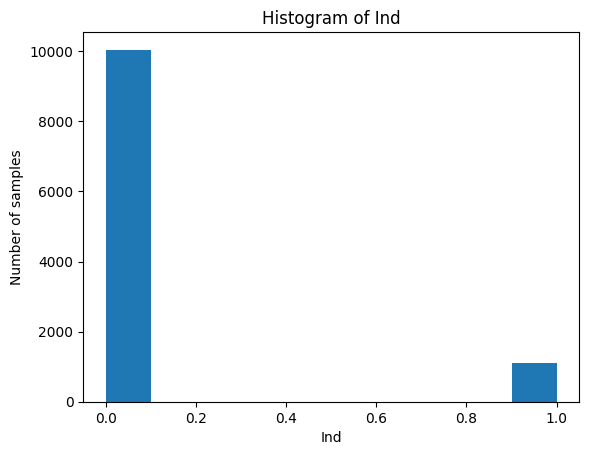

In [ ]:
# draw histogram for ind
df.ind.plot.hist()
plt.title('Histogram of Ind')
plt.xlabel('Ind')
plt.ylabel('Number of samples')
plt.show()

In [ ]:
# class 0 - human
10044/11144

0.9012921751615219

In [ ]:
# class 1 - AI
1100/11144

0.0987078248384781

There are 10044 samples (90.13%) by human and 1100 samples (9.87%) by AI. The dataset is heavily imbalanced.

## Predictive variables

### Word Count

In [ ]:
# describe
df.word_count.describe()

count    11144.000000
mean        29.978643
std         10.271548
min          5.000000
25%         22.000000
50%         30.000000
75%         38.000000
max         57.000000
Name: word_count, dtype: float64

The shortest sample has 5 words. The longest sample has 57 words.

The averaged sample size is 29.98 words. The median is 30 words. The distribution is not heavily skewed.

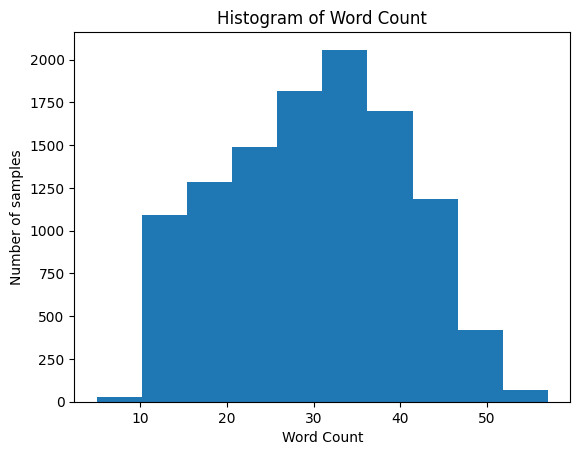

In [ ]:
# draw histogram for word count
df.word_count.plot.hist()
plt.title('Histogram of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Number of samples')
plt.show()

The distribution is not symmetric, but quite balanced, not heavily skewed.

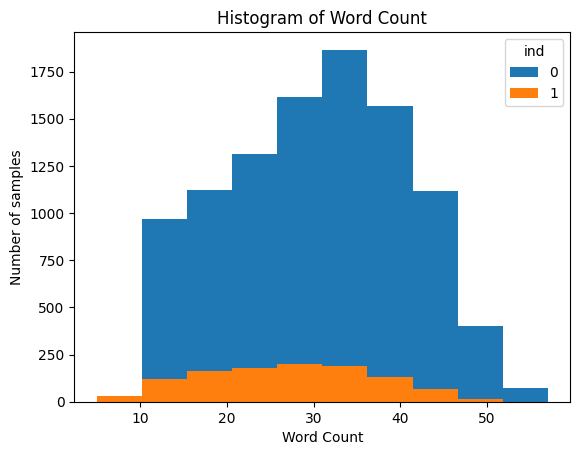

In [ ]:
# draw histogram for word count
df.pivot(columns='ind', values='word_count').plot.hist()
plt.title('Histogram of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Number of samples')
plt.show()

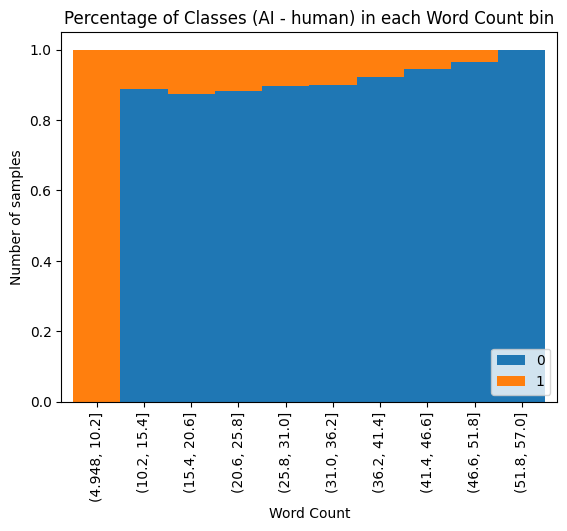

In [ ]:
# draw percentage for word count
pd.crosstab(pd.cut(df.word_count, bins=10),
             df.ind, normalize='index').plot.bar(stacked=True, width = 1.0)
plt.title('Percentage of Classes (AI - human) in each Word Count bin')
plt.xlabel('Word Count')
plt.ylabel('Number of samples')
plt.legend(loc = 'lower right')
plt.show()

It can be seen that samples by AI tend to be shorter than samples by human.

### Number of Punctuations

In [ ]:
# describe
df.punc_num.describe()

count    11144.000000
mean         7.347003
std          4.041350
min          0.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         27.000000
Name: punc_num, dtype: float64

The shortest sample has 0 punctuations. The longest sample has 27 punctuations.

The averaged number of punctuations is 7.35. The median is 7.

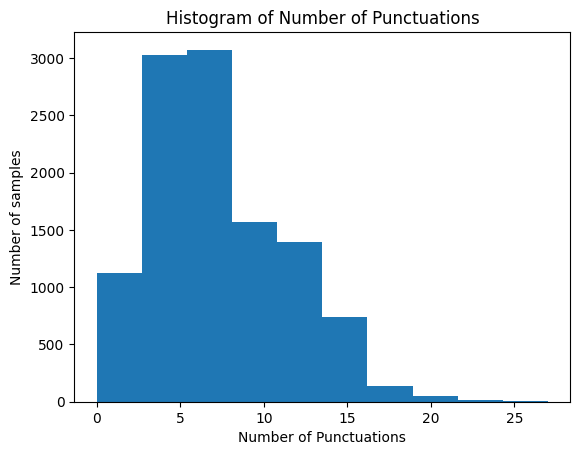

In [ ]:
# draw histogram for number of punctuations
df.punc_num.plot.hist()
plt.title('Histogram of Number of Punctuations')
plt.xlabel('Number of Punctuations')
plt.ylabel('Number of samples')
plt.show()

The distribution is right skewed.

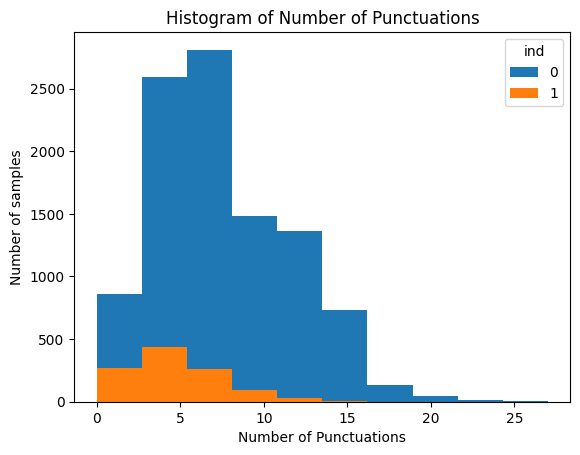

In [ ]:
# draw histogram for number of punctuations
df.pivot(columns='ind', values='punc_num').plot.hist()
plt.title('Histogram of Number of Punctuations')
plt.xlabel('Number of Punctuations')
plt.ylabel('Number of samples')
plt.show()

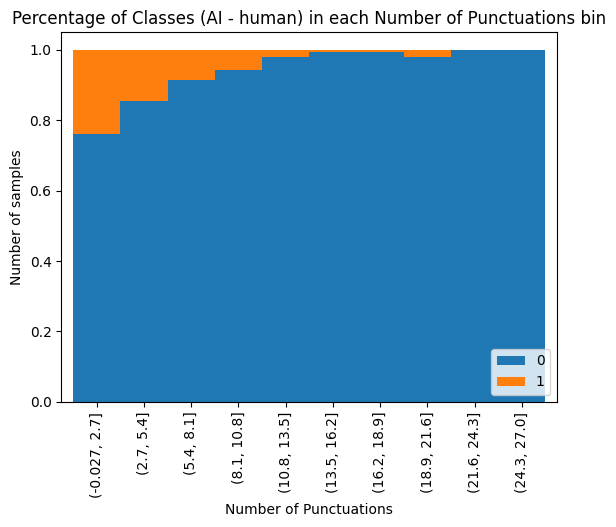

In [ ]:
# draw percentage for number of punctuations
pd.crosstab(pd.cut(df.punc_num, bins=10),
             df.ind, normalize='index').plot.bar(stacked=True, width = 1.0)
plt.title('Percentage of Classes (AI - human) in each Number of Punctuations bin')
plt.xlabel('Number of Punctuations')
plt.ylabel('Number of samples')
plt.legend(loc = 'lower right')
plt.show()

It can be seen that samples by AI tend to use fewer punctuations than samples by human.

## Correlation matrix

Since feature_0 to feature_767 are word embeddings of the sentence, we do not use them in the correlation matrix.

In [ ]:
# correlation matrix
corr = df[['word_count', 'punc_num', 'ind']].corr()
corr

,word_count,punc_num,ind
word_count,1.000000,0.407403,-0.093746
punc_num,0.407403,1.000000,-0.210214
ind,-0.093746,-0.210214,1.000000


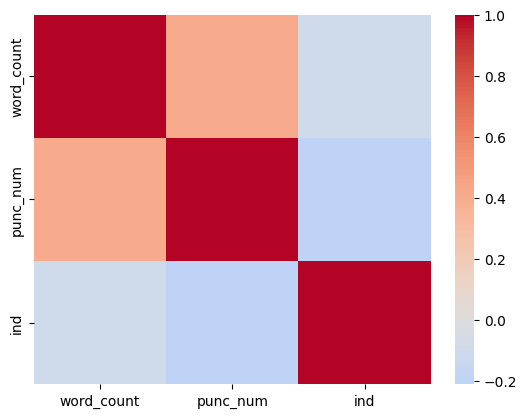

In [ ]:
# draw heatmap
sns.heatmap(corr, cmap = 'coolwarm', center = 0)
plt.show()

Number of punctuations is correlated with word count (0.41). However, these two variables do not have strong correlations with ind (only -0.09 and -0.21 respectively).

# Prepare Data for Modeling

## Drop ID column

Because ID column is not used for training, we will drop it.

In [ ]:
# drop ID column
df.drop('ID', axis = 1, inplace = True)

In [ ]:
# check result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11144 entries, 0 to 11143
Columns: 771 entries, feature_0 to ind
dtypes: float64(768), int64(3)
memory usage: 65.6 MB


In [ ]:
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num,ind
0,0.231980,-0.190620,-0.985933,-0.233773,-0.355879,-0.488884,0.254773,-0.121213,-0.820528,-1.161955,...,0.101373,0.575414,-0.567646,-0.051293,0.455840,0.065538,0.020671,25,14,0
1,0.168223,-1.204551,-0.596952,-0.722583,0.284799,-0.238639,-0.410948,-0.090654,1.220703,-1.157622,...,0.407270,0.769329,0.555820,0.252843,0.603888,1.240028,-0.076253,23,4,0
2,0.522005,-0.759933,-1.209413,0.301834,0.361126,0.158161,-0.117013,0.313158,1.102455,-1.646261,...,0.143658,0.874958,0.679421,0.393198,0.439103,0.742181,-0.430493,29,8,0
3,0.038746,-1.408335,-0.580810,0.353450,1.142353,-0.418879,-0.134133,-0.199796,1.071100,-1.609315,...,0.728436,0.540930,1.968447,0.185315,0.630167,0.577032,0.117681,14,3,0
4,-0.307572,0.103575,-0.368605,-0.378654,-0.285990,-0.508058,-0.254869,-0.108291,-0.095139,-1.745294,...,-0.146845,0.497731,-0.299924,-0.020024,0.975511,-0.342360,-0.428779,35,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11139,0.388275,-0.776383,-1.236468,-0.090159,0.013522,-0.337909,0.057852,-0.301914,0.062450,-1.060892,...,1.512474,0.831832,0.745663,0.457758,0.683687,-0.016386,-0.003027,15,2,0
11140,0.096468,-0.810038,-0.847827,-1.130093,-0.575835,-0.792116,-0.358161,-0.007668,-0.041767,-0.931957,...,-0.022681,0.207045,-0.638626,-0.147649,0.244370,-0.398683,0.193817,34,9,1
11141,-0.277712,-0.822547,-0.788966,-0.783690,0.605847,-0.232772,-0.269033,0.057341,0.272056,-1.157438,...,0.383307,0.451840,1.565928,0.381249,0.249458,1.130406,0.863415,12,5,0
11142,0.388307,-0.267300,-0.873434,-0.309149,-0.403474,-0.279639,-0.053389,0.129763,-0.021183,-1.397921,...,0.469792,1.477182,0.376207,0.327769,0.187805,0.098002,-0.411851,30,7,0


## Split data to train - test set

Because the data is imbalanced, we use stratified split by the target variable 'ind'. Train-test ratio is 90-10, and random_state is 42 as specified in the rubric.

In [ ]:
# split the data
X = df.drop('ind', axis = 1)
y = df['ind']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    shuffle = True,
                                                    stratify = y,
                                                    random_state = 42)

In [ ]:
# shape of X_train
X_train.shape

(10029, 770)

In [ ]:
# shape of X_test
X_test.shape

(1115, 770)

In [ ]:
# shape of y_train
y_train.shape

(10029,)

In [ ]:
# shape of y_test
y_test.shape

(1115,)

## Oversampling the target variable

We use RandomOverSampler on train set to balance out the imbalance classes, which will help with the training process and result at the end. Random_state is set at 42 for reproducability.

In [ ]:
# example of random oversampling to balance the class distribution
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority', random_state = 42)
# fit and apply the transform
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_train))

Counter({0: 9039, 1: 9039})


## Standardize X

In [ ]:
# import standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Use fit_transform() from StandardScaler() on X_train
X_train = scaler.fit_transform(X_train)
#Use transform() to apply that StandardScaler() to X_test
X_test = scaler.transform(X_test)

# Best model: Feed-forward NN + C1DNN

In [ ]:
# resets names in the model summary
K.clear_session()

In [ ]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(0)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

In [ ]:
# define model
model = models.Sequential()
model.add(layers.Dense(770,
                       input_shape=(X_train.shape[1],),
                       activation='relu',
                       kernel_initializer=keras.initializers.RandomNormal(), # initiating weights
                       bias_initializer=keras.initializers.Zeros())) # initiating biases
model.add(layers.Dropout(0.3))
model.add(layers.Dense(770,
                       activation='relu',
                       kernel_initializer=keras.initializers.RandomNormal(),
                       bias_initializer=keras.initializers.Zeros()))
model.add(layers.Dropout(0.3))
model.add(layers.Reshape((770, 1)))
model.add(layers.Conv1D(128,
                        11,
                        activation='relu',
                        kernel_initializer=keras.initializers.RandomNormal(),
                        bias_initializer=keras.initializers.Zeros()))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(128,
                       activation='relu',
                       kernel_initializer=keras.initializers.RandomNormal(),
                       bias_initializer=keras.initializers.Zeros()))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1,
                       activation='sigmoid',
                       kernel_initializer=keras.initializers.RandomNormal(),
                       bias_initializer=keras.initializers.Zeros()))

In [ ]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 770)               593670    
                                                                 
 dropout (Dropout)           (None, 770)               0         
                                                                 
 dense_1 (Dense)             (None, 770)               593670    
                                                                 
 dropout_1 (Dropout)         (None, 770)               0         
                                                                 
 reshape (Reshape)           (None, 770, 1)            0         
                                                                 
 conv1d (Conv1D)             (None, 760, 128)          1536      
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0

In [ ]:
# compile model
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])

In [ ]:
# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=10,
                   restore_best_weights = True)

In [ ]:
# fit the model
history = model.fit(X_train, y_train,
                    epochs=10000,
                    batch_size=100,
                    validation_data=(X_test, y_test),
                    callbacks=[es],
                    shuffle=True)

Epoch 1/10000
181/181 [==============================] - 15s 11ms/step - loss: 0.6809 - acc: 0.5103 - val_loss: 0.7612 - val_acc: 0.1004
Epoch 2/10000
181/181 [==============================] - 2s 9ms/step - loss: 0.5332 - acc: 0.7138 - val_loss: 0.4000 - val_acc: 0.8493
Epoch 3/10000
181/181 [==============================] - 2s 9ms/step - loss: 0.3324 - acc: 0.8614 - val_loss: 0.3010 - val_acc: 0.8744
Epoch 4/10000
181/181 [==============================] - 2s 9ms/step - loss: 0.2526 - acc: 0.8989 - val_loss: 0.2268 - val_acc: 0.9175
Epoch 5/10000
181/181 [==============================] - 2s 9ms/step - loss: 0.2031 - acc: 0.9221 - val_loss: 0.1953 - val_acc: 0.9327
Epoch 6/10000
181/181 [==============================] - 2s 9ms/step - loss: 0.1616 - acc: 0.9396 - val_loss: 0.1857 - val_acc: 0.9372
Epoch 7/10000
181/181 [==============================] - 2s 11ms/step - loss: 0.1332 - acc: 0.9519 - val_loss: 0.1688 - val_acc: 0.9417
Epoch 8/10000
181/181 [=============================

# Evaluation of best model

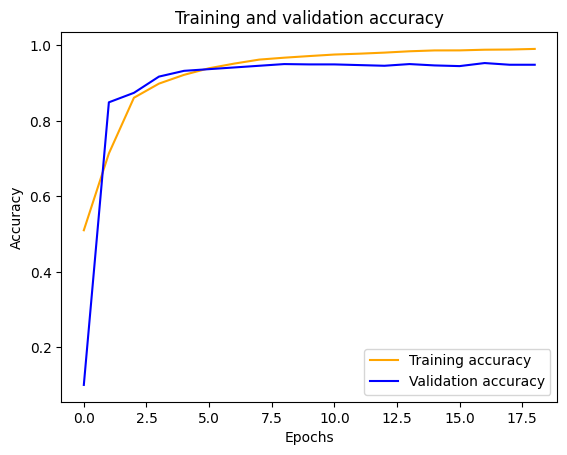

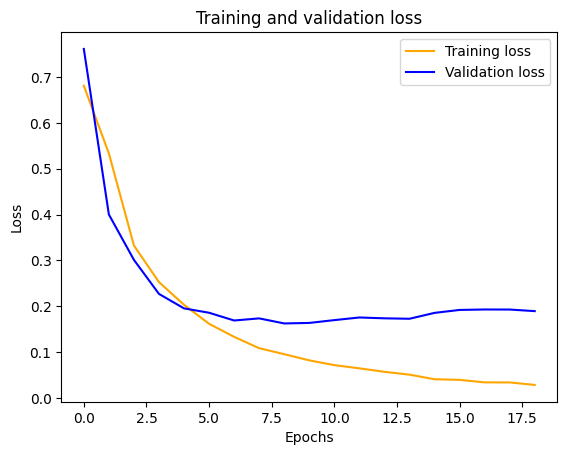

In [ ]:
# draw training history plots
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# accuracy plot
plt.plot(epochs, acc, 'orange', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# loss plot
plt.figure()
plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The model overfit a little bit. The accuracy for validation set is lower than the accuracy for train set, and the loss for validation set is higher than the loss for train set. The curves of train and validation are smooth and pretty close to each other, which is a sign that the training process is doing well. The model starts to converge after 5 epochs, and the val_loss stops decreasing after 9 epochs.

In [ ]:
# predict
results = model.predict(X_test)

35/35 [==============================] - 0s 2ms/step


In [ ]:
# confusion matrix
print(confusion_matrix(y_true=y_test,
                       y_pred=np.round(results,0)))

[[983  22]
 [ 33  77]]


In [ ]:
# classification report
print(classification_report(y_true=y_test,
                            y_pred=np.round(results,0)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1005
           1       0.78      0.70      0.74       110

    accuracy                           0.95      1115
   macro avg       0.87      0.84      0.85      1115
weighted avg       0.95      0.95      0.95      1115



Identifying AI text is much harder, both the precision and recall for class 1 is much lower than the precision and recall for class 0. The f1-score for class 1 is closer to the overall f1_score of the model.

In [ ]:
# f1 score
print(f1_score(y_true=y_test,
               y_pred=np.round(results,0)))

0.7368421052631577


F1_score is 0.7368! 🎉🥳

In [ ]:
# Save the entire model as a `.keras` zip archive.
model.save('ffnn_c1dnn.keras')

# Discussion/Conclusion

1. Using 'val_loss' as the monitor for early stopping instead of 'val_acc' is better because the data is imbalanced, and the evaluation is on f1_score. Using 'val_acc' might be misleading because the majority class might overpower the minority class (in the test data, the class ratio is kept as original).

1. Even after setting a fixed random seed, the results can still vary. Reproducing results is hard for keras. We read on Stackoverflow is that because it is due to GPU behavior. GPU can introduce randomness into our model. After limitting the GPU randomness and setting the initializer for weights and biases of models, we were able to reproduce result consistently.

1. Setting random_seed and limitting GPU randomness for reproducability affects the model performance greatly, both in training time and f1_score. Setting different random_seed also produces different results and requires different finetuning.

1. RNN architectures are not working. In order for RNN to work, sentences need to have sequential relation. However in this case, the samples are not related to each other, and each sample should be treated as individual.

1. CNN is working fine in combination with feed-forward NN. Both in sequential model and non-sequential model. 2 Dense + 1 Conv1D + 1 Dense architecture produce our best result.

#Appendix

##RNN Model 1

In [ ]:
# resets names in the model summary
K.clear_session()
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(0)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

from numpy import array

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in np.arange(len(sequences)): # be careful of this line!
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

n_steps = 10 # lookback
raw_seq = np.array(df)
X1, y1 = split_sequences(raw_seq, n_steps)

train_pct_index = int(0.9* len(X1))
X1_train, X1_test = X1[:train_pct_index], X1[train_pct_index:]
y1_train, y1_test = y1[:train_pct_index], y1[train_pct_index:]
n_steps = X1_train.shape[1]
n_features = X1_train.shape[2]

In [ ]:
from keras.layers import Conv1D, MaxPooling1D, Bidirectional, GRU
# define model
model = models.Sequential()
model.add(layers.SimpleRNN(32, return_sequences=True, activation='relu', recurrent_dropout=0.2)) #100 rows (words), 64 columns (dimensions)
model.add(Bidirectional(layers.SimpleRNN(64,
                            activation='relu',
                            recurrent_dropout=0.1)))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1, activation='sigmoid'))
#compile model
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

#early stopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=10,
                   verbose=1,
                   restore_best_weights=True)

# fit the model
history = model.fit(X1_train, y1_train,
                    epochs=10000,
                    batch_size=100,
                    validation_data=(X1_test, y1_test),
                    callbacks=[es],
                    shuffle=True)

Epoch 1/10000
101/101 [==============================] - 15s 67ms/step - loss: 0.3102 - acc: 0.9020 - val_loss: 0.2479 - val_acc: 0.9111
Epoch 2/10000
101/101 [==============================] - 7s 68ms/step - loss: 0.2385 - acc: 0.9176 - val_loss: 0.2111 - val_acc: 0.9273
Epoch 3/10000
101/101 [==============================] - 5s 49ms/step - loss: 0.2133 - acc: 0.9256 - val_loss: 0.1929 - val_acc: 0.9300
Epoch 4/10000
101/101 [==============================] - 5s 54ms/step - loss: 0.1889 - acc: 0.9342 - val_loss: 0.2201 - val_acc: 0.9291
Epoch 5/10000
101/101 [==============================] - 6s 58ms/step - loss: 0.1760 - acc: 0.9425 - val_loss: 0.1939 - val_acc: 0.9363
Epoch 6/10000
101/101 [==============================] - 5s 47ms/step - loss: 0.1680 - acc: 0.9451 - val_loss: 0.1799 - val_acc: 0.9470
Epoch 7/10000
101/101 [==============================] - 10s 95ms/step - loss: 0.1538 - acc: 0.9483 - val_loss: 0.2611 - val_acc: 0.9264
Epoch 8/10000
101/101 [=======================

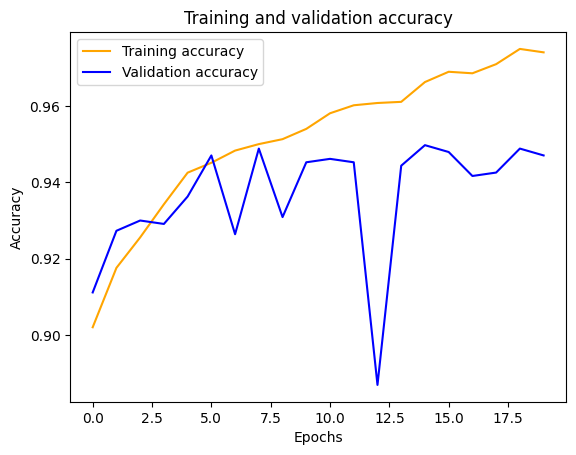

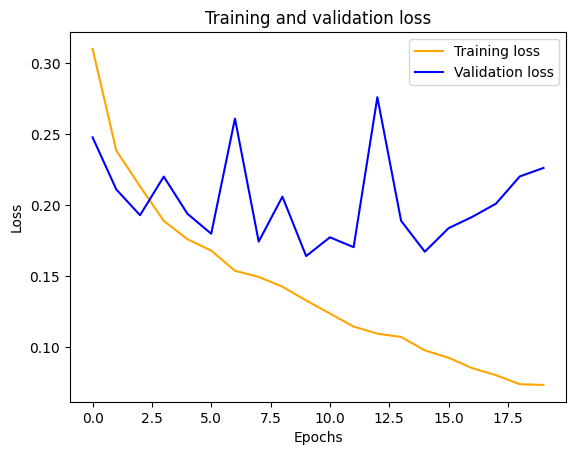

In [ ]:
# draw training history plots
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# accuracy plot
plt.plot(epochs, acc, 'orange', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# loss plot
plt.figure()
plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# predict
results = model.predict(X1_test)
# confusion matrix
print(confusion_matrix(y_true=y1_test,
                       y_pred=np.round(results,0)))
# classification report
print(classification_report(y_true=y1_test,
                            y_pred=np.round(results,0)))
# f1 score
print(f1_score(y_true=y1_test,
               y_pred=np.round(results,0)))

35/35 [==============================] - 1s 7ms/step
[[982  21]
 [ 40  71]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1003
         1.0       0.77      0.64      0.70       111

    accuracy                           0.95      1114
   macro avg       0.87      0.81      0.83      1114
weighted avg       0.94      0.95      0.94      1114

0.6995073891625616


##RNN Model 2: LSTM

In [ ]:
# resets names in the model summary
K.clear_session()
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(0)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()


##BUILD THE MODEL
model = models.Sequential()
model.add(layers.LSTM(128, activation='relu', input_shape=(n_steps, n_features), return_sequences=True))
model.add(layers.LSTM(64, activation='relu', return_sequences=True, recurrent_dropout=0.1))
model.add(layers.LSTM(32, activation='relu', recurrent_dropout=0.1))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])

es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=10,
                   verbose=1,
                   restore_best_weights=True)

# fit the model
history = model.fit(X1_train, y1_train,
                    epochs=10000,
                    batch_size=100,
                    validation_data=(X1_test, y1_test),
                    callbacks=[es],
                    shuffle=True)


Epoch 1/10000
101/101 [==============================] - 20s 125ms/step - loss: 0.3563 - acc: 0.8898 - val_loss: 0.3092 - val_acc: 0.9004
Epoch 2/10000
101/101 [==============================] - 11s 111ms/step - loss: 0.2518 - acc: 0.9146 - val_loss: 0.2042 - val_acc: 0.9282
Epoch 3/10000
101/101 [==============================] - 11s 104ms/step - loss: 0.1961 - acc: 0.9340 - val_loss: 0.1845 - val_acc: 0.9434
Epoch 4/10000
101/101 [==============================] - 12s 118ms/step - loss: 0.1737 - acc: 0.9425 - val_loss: 0.1963 - val_acc: 0.9390
Epoch 5/10000
101/101 [==============================] - 12s 118ms/step - loss: 0.1673 - acc: 0.9430 - val_loss: 0.1674 - val_acc: 0.9452
Epoch 6/10000
101/101 [==============================] - 13s 125ms/step - loss: 0.1521 - acc: 0.9504 - val_loss: 0.1679 - val_acc: 0.9497
Epoch 7/10000
101/101 [==============================] - 12s 118ms/step - loss: 0.1369 - acc: 0.9547 - val_loss: 0.2087 - val_acc: 0.9399
Epoch 8/10000
101/101 [===========

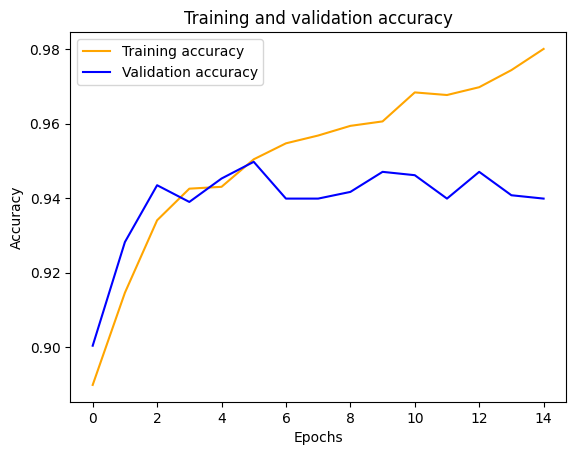

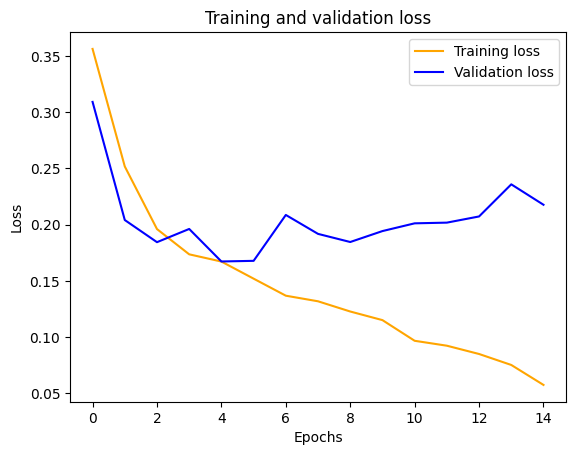

In [ ]:
# draw training history plots
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# accuracy plot
plt.plot(epochs, acc, 'orange', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# loss plot
plt.figure()
plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# predict
results = model.predict(X1_test)
# confusion matrix
print(confusion_matrix(y_true=y1_test,
                       y_pred=np.round(results,0)))
# classification report
print(classification_report(y_true=y1_test,
                            y_pred=np.round(results,0)))
# f1 score
print(f1_score(y_true=y1_test,
               y_pred=np.round(results,0)))

35/35 [==============================] - 1s 10ms/step
[[989  14]
 [ 47  64]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1003
         1.0       0.82      0.58      0.68       111

    accuracy                           0.95      1114
   macro avg       0.89      0.78      0.82      1114
weighted avg       0.94      0.95      0.94      1114

0.6772486772486772


##Feed Forward NN + C2DNN

In [ ]:
# resets names in the model summary
K.clear_session()

# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(0)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

# define model

input = layers.Input(shape=(X_train.shape[1],))

d1 = layers.Dense(770,
                  activation='relu',
                  kernel_initializer=keras.initializers.RandomNormal(),
                  bias_initializer=keras.initializers.Zeros())(input)
dr1 = layers.Dropout(0.2)(d1)
d2 = layers.Dense(770,
                  activation='relu',
                  kernel_initializer=keras.initializers.RandomNormal(),
                  bias_initializer=keras.initializers.Zeros())(input)
dr2 = layers.Dropout(0.2)(d2)
d3 = layers.Dense(770,
                  activation='relu',
                  kernel_initializer=keras.initializers.RandomNormal(),
                  bias_initializer=keras.initializers.Zeros())(input)
dr3 = layers.Dropout(0.2)(d3)
d4 = layers.Dense(770,
                  activation='relu',
                  kernel_initializer=keras.initializers.RandomNormal(),
                  bias_initializer=keras.initializers.Zeros())(input)
dr4 = layers.Dropout(0.2)(d4)
d5 = layers.Dense(770,
                  activation='relu',
                  kernel_initializer=keras.initializers.RandomNormal(),
                  bias_initializer=keras.initializers.Zeros())(input)
dr5 = layers.Dropout(0.2)(d5)

com = layers.Concatenate()([dr1, dr2, dr3, dr4, dr5])
res = layers.Reshape((5, 770, 1))(com)
cnn = layers.Conv2D(128, (5, 5),
                    activation='relu',
                    kernel_initializer=keras.initializers.RandomNormal(),
                    bias_initializer=keras.initializers.Zeros())(res)
pooling = layers.GlobalMaxPooling2D()(cnn)
d6 = layers.Dense(128,
                  activation='relu',
                  kernel_initializer=keras.initializers.RandomNormal(),
                  bias_initializer=keras.initializers.Zeros())(pooling)
dr6 = layers.Dropout(0.2)(d6)
output = layers.Dense(1,
                      activation='sigmoid',
                      kernel_initializer=keras.initializers.RandomNormal(),
                      bias_initializer=keras.initializers.Zeros())(dr6)

model = keras.Model(inputs=input, outputs=output)

# model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 770)]                0         []                            
                                                                                                  
 dense (Dense)               (None, 770)                  593670    ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 770)                  593670    ['input_1[0][0]']             
                                                                                                  
 dense_2 (Dense)             (None, 770)                  593670    ['input_1[0][0]']             
                                                                                              

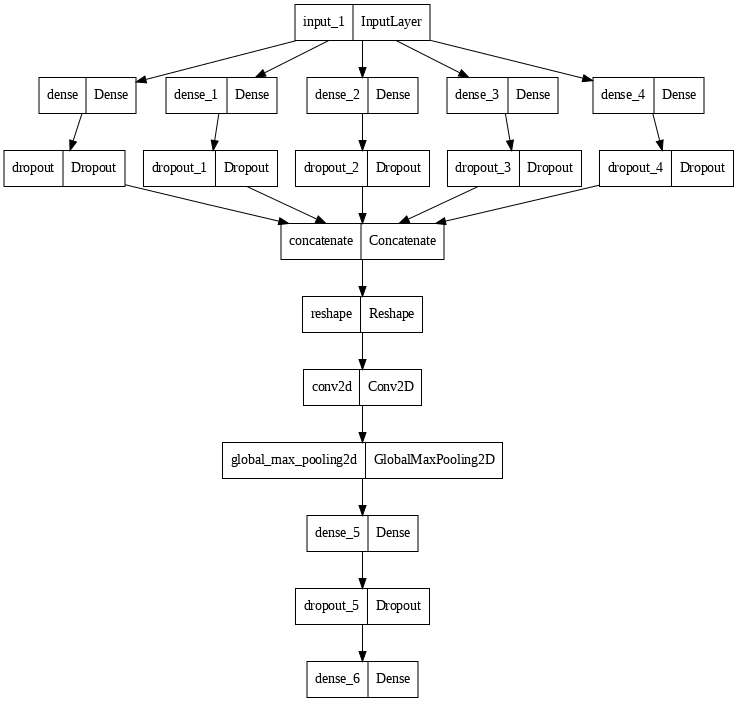

In [ ]:
# visual representation of the model
keras.utils.plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=72)

In [ ]:
# compile model
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])
# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=10,
                   restore_best_weights = True)
# fit the model
history = model.fit(X_train, y_train,
                    epochs=10000,
                    batch_size=100,
                    validation_data=(X_test, y_test),
                    callbacks=[es],
                    shuffle=True)

Epoch 1/10000
181/181 [==============================] - 8s 29ms/step - loss: 0.6525 - acc: 0.6263 - val_loss: 0.5731 - val_acc: 0.6547
Epoch 2/10000
181/181 [==============================] - 5s 26ms/step - loss: 0.3996 - acc: 0.8404 - val_loss: 0.3318 - val_acc: 0.8601
Epoch 3/10000
181/181 [==============================] - 5s 27ms/step - loss: 0.1983 - acc: 0.9381 - val_loss: 0.2308 - val_acc: 0.9148
Epoch 4/10000
181/181 [==============================] - 5s 27ms/step - loss: 0.0999 - acc: 0.9734 - val_loss: 0.1834 - val_acc: 0.9336
Epoch 5/10000
181/181 [==============================] - 6s 34ms/step - loss: 0.0556 - acc: 0.9868 - val_loss: 0.1763 - val_acc: 0.9435
Epoch 6/10000
181/181 [==============================] - 6s 34ms/step - loss: 0.0354 - acc: 0.9923 - val_loss: 0.1819 - val_acc: 0.9453
Epoch 7/10000
181/181 [==============================] - 5s 30ms/step - loss: 0.0253 - acc: 0.9947 - val_loss: 0.1935 - val_acc: 0.9417
Epoch 8/10000
181/181 [=========================

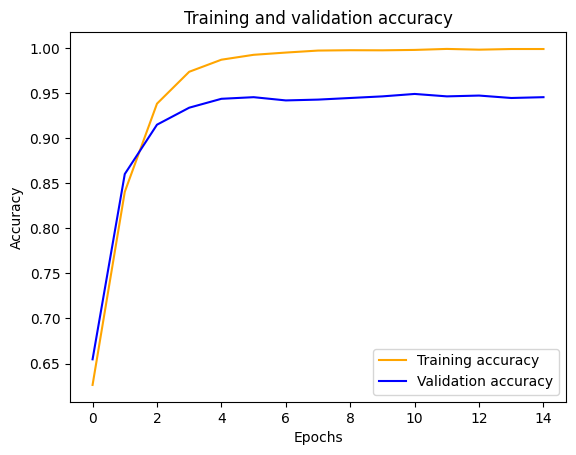

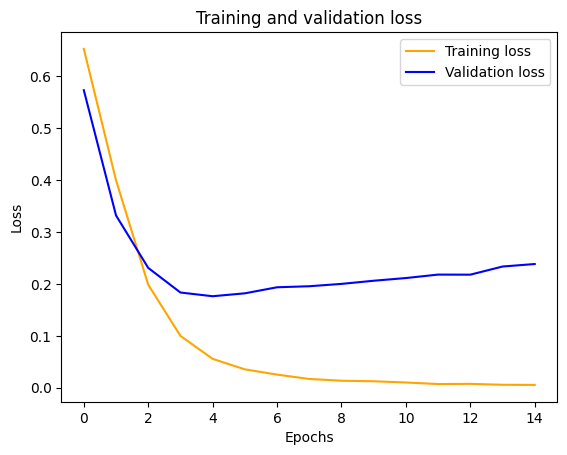

In [ ]:
# draw training history plots
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# accuracy plot
plt.plot(epochs, acc, 'orange', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# loss plot
plt.figure()
plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# predict
results = model.predict(X_test)
# confusion matrix
print(confusion_matrix(y_true=y_test,
                       y_pred=np.round(results,0)))
# classification report
print(classification_report(y_true=y_test,
                            y_pred=np.round(results,0)))
# f1 score
print(f1_score(y_true=y_test,
               y_pred=np.round(results,0)))
# Save the entire model as a `.keras` zip archive.
model.save('ffnn_c2dnn.keras')

35/35 [==============================] - 0s 2ms/step
[[983  22]
 [ 41  69]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1005
           1       0.76      0.63      0.69       110

    accuracy                           0.94      1115
   macro avg       0.86      0.80      0.83      1115
weighted avg       0.94      0.94      0.94      1115

0.6865671641791045


## Feed Foward NN + BiLSTM

In [ ]:
# resets names in the model summary
K.clear_session()

# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(0)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()


# define model

input = layers.Input(shape=(X_train.shape[1],))

d1 = layers.Dense(770, activation='relu',
                       kernel_initializer=keras.initializers.RandomNormal(),
                       bias_initializer=keras.initializers.Zeros())(input)
dr1 = layers.Dropout(0.4)(d1)
d2 = layers.Dense(770, activation='relu',
                       kernel_initializer=keras.initializers.RandomNormal(),
                       bias_initializer=keras.initializers.Zeros())(input)
dr2 = layers.Dropout(0.4)(d2)
d3 = layers.Dense(770, activation='relu',
                       kernel_initializer=keras.initializers.RandomNormal(),
                       bias_initializer=keras.initializers.Zeros())(input)
dr3 = layers.Dropout(0.4)(d3)
d4 = layers.Dense(770, activation='relu',
                       kernel_initializer=keras.initializers.RandomNormal(),
                       bias_initializer=keras.initializers.Zeros())(input)
dr4 = layers.Dropout(0.4)(d4)
d5 = layers.Dense(770, activation='relu',
                       kernel_initializer=keras.initializers.RandomNormal(),
                       bias_initializer=keras.initializers.Zeros())(input)
dr5 = layers.Dropout(0.4)(d5)

com = layers.Concatenate()([dr1, dr2, dr3, dr4, dr5])
res = layers.Reshape((5, 770))(com)
rnn = layers.Bidirectional(layers.LSTM(128,
                                       activation='tanh',
                                       kernel_initializer=keras.initializers.RandomNormal(),
                                       bias_initializer=keras.initializers.Zeros()))(res)
d6 = layers.Dense(128, activation='relu',
                       kernel_initializer=keras.initializers.RandomNormal(),
                       bias_initializer=keras.initializers.Zeros())(rnn)
dr6 = layers.Dropout(0.4)(d6)
output = layers.Dense(1,
                      activation='sigmoid',
                      kernel_initializer=keras.initializers.RandomNormal(),
                      bias_initializer=keras.initializers.Zeros())(dr6)

model = keras.Model(inputs=input, outputs=output)

# model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 770)]                0         []                            
                                                                                                  
 dense (Dense)               (None, 770)                  593670    ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 770)                  593670    ['input_1[0][0]']             
                                                                                                  
 dense_2 (Dense)             (None, 770)                  593670    ['input_1[0][0]']             
                                                                                              

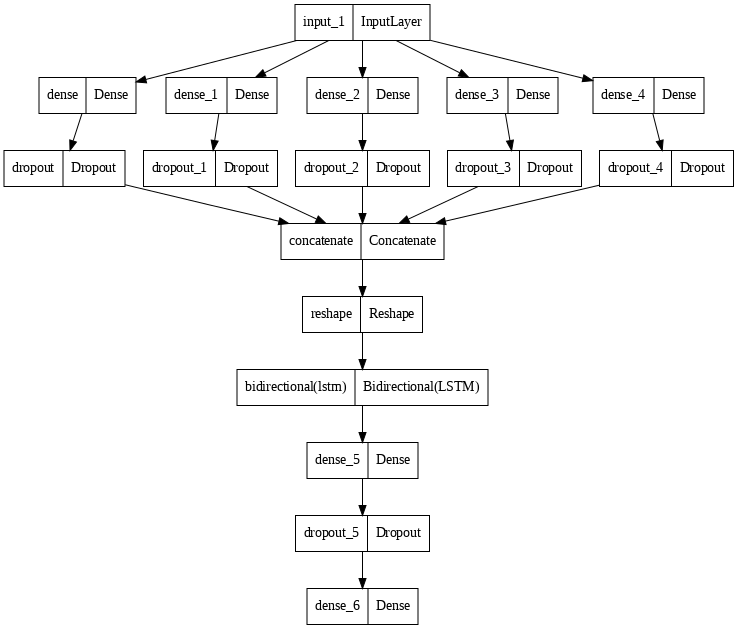

In [ ]:
# visual representation of the model
keras.utils.plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=72)

In [ ]:
# compile model
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=10,
                   restore_best_weights = True)
# fit the model
history = model.fit(X_train, y_train,
                    epochs=10000,
                    batch_size=100,
                    validation_data=(X_test, y_test),
                    callbacks=[es],
                    shuffle=True)

Epoch 1/10000
181/181 [==============================] - 9s 14ms/step - loss: 0.4924 - acc: 0.7611 - val_loss: 0.2905 - val_acc: 0.8610
Epoch 2/10000
181/181 [==============================] - 2s 9ms/step - loss: 0.2518 - acc: 0.8956 - val_loss: 0.2476 - val_acc: 0.9004
Epoch 3/10000
181/181 [==============================] - 2s 9ms/step - loss: 0.1546 - acc: 0.9406 - val_loss: 0.1892 - val_acc: 0.9390
Epoch 4/10000
181/181 [==============================] - 2s 9ms/step - loss: 0.1011 - acc: 0.9648 - val_loss: 0.2018 - val_acc: 0.9525
Epoch 5/10000
181/181 [==============================] - 2s 9ms/step - loss: 0.0725 - acc: 0.9746 - val_loss: 0.2385 - val_acc: 0.9408
Epoch 6/10000
181/181 [==============================] - 2s 11ms/step - loss: 0.0510 - acc: 0.9823 - val_loss: 0.2421 - val_acc: 0.9543
Epoch 7/10000
181/181 [==============================] - 2s 12ms/step - loss: 0.0457 - acc: 0.9834 - val_loss: 0.2737 - val_acc: 0.9534
Epoch 8/10000
181/181 [=============================

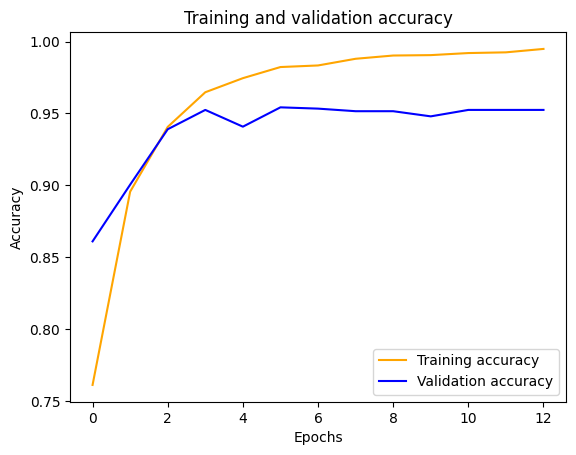

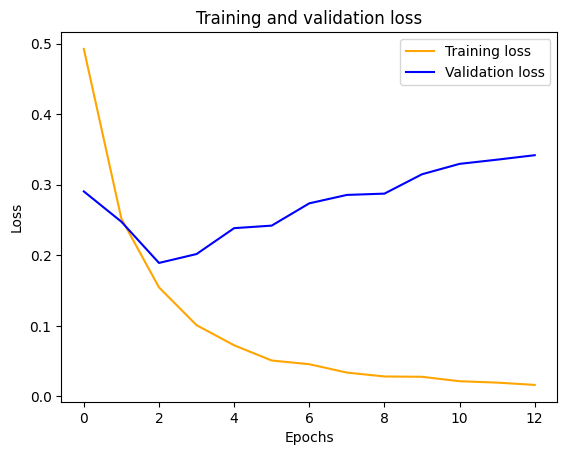

In [ ]:
# draw training history plots
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# accuracy plot
plt.plot(epochs, acc, 'orange', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# loss plot
plt.figure()
plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# predict
results = model.predict(X_test)
# confusion matrix
print(confusion_matrix(y_true=y_test,
                       y_pred=np.round(results,0)))
# classification report
print(classification_report(y_true=y_test,
                            y_pred=np.round(results,0)))
# f1 score
print("F1: ",f1_score(y_true=y_test,
               y_pred=np.round(results,0)))
# Save the entire model as a `.keras` zip archive.
model.save('ffnn_rnn.keras')

35/35 [==============================] - 2s 5ms/step
[[970  35]
 [ 33  77]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1005
           1       0.69      0.70      0.69       110

    accuracy                           0.94      1115
   macro avg       0.83      0.83      0.83      1115
weighted avg       0.94      0.94      0.94      1115

F1:  0.6936936936936936


##Feed Forward NN

In [ ]:
# resets names in the model summary
K.clear_session()

# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(0)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()


# define model
model = models.Sequential()
model.add(layers.Dense(770,
                       input_shape=(X_train.shape[1],),
                       activation='relu',
                       kernel_initializer=keras.initializers.RandomNormal(),
                       bias_initializer=keras.initializers.Zeros()))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(770,
                       activation='relu',
                       kernel_initializer=keras.initializers.RandomNormal(),
                       bias_initializer=keras.initializers.Zeros()))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(770,
                       activation='relu',
                       kernel_initializer=keras.initializers.RandomNormal(),
                       bias_initializer=keras.initializers.Zeros()))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(770,
                       activation='relu',
                       kernel_initializer=keras.initializers.RandomNormal(),
                       bias_initializer=keras.initializers.Zeros()))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(770,
                       activation='relu',
                       kernel_initializer=keras.initializers.RandomNormal(),
                       bias_initializer=keras.initializers.Zeros()))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(1,
                       activation='sigmoid',
                       kernel_initializer=keras.initializers.RandomNormal(),
                       bias_initializer=keras.initializers.Zeros()))

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 770)               593670    
                                                                 
 dropout (Dropout)           (None, 770)               0         
                                                                 
 dense_1 (Dense)             (None, 770)               593670    
                                                                 
 dropout_1 (Dropout)         (None, 770)               0         
                                                                 
 dense_2 (Dense)             (None, 770)               593670    
                                                                 
 dropout_2 (Dropout)         (None, 770)               0         
                                                                 
 dense_3 (Dense)             (None, 770)               5

In [ ]:
# compile model
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics = ['acc'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=10,
                   restore_best_weights = True)
# fit the model
history = model.fit(X_train, y_train,
                    epochs=10000,
                    batch_size=100,
                    validation_data=(X_test, y_test),
                    callbacks=[es],
                    shuffle=True)

Epoch 1/10000
181/181 [==============================] - 3s 7ms/step - loss: 2.8175 - acc: 0.5122 - val_loss: 0.6709 - val_acc: 0.6018
Epoch 2/10000
181/181 [==============================] - 1s 5ms/step - loss: 1.5710 - acc: 0.5224 - val_loss: 0.6469 - val_acc: 0.7022
Epoch 3/10000
181/181 [==============================] - 1s 6ms/step - loss: 1.2009 - acc: 0.5248 - val_loss: 0.6589 - val_acc: 0.6682
Epoch 4/10000
181/181 [==============================] - 1s 6ms/step - loss: 0.9982 - acc: 0.5367 - val_loss: 0.6400 - val_acc: 0.7865
Epoch 5/10000
181/181 [==============================] - 1s 7ms/step - loss: 0.8722 - acc: 0.5627 - val_loss: 0.6288 - val_acc: 0.7964
Epoch 6/10000
181/181 [==============================] - 1s 7ms/step - loss: 0.8035 - acc: 0.5779 - val_loss: 0.6036 - val_acc: 0.7946
Epoch 7/10000
181/181 [==============================] - 1s 8ms/step - loss: 0.7319 - acc: 0.6049 - val_loss: 0.5666 - val_acc: 0.7991
Epoch 8/10000
181/181 [==============================] 

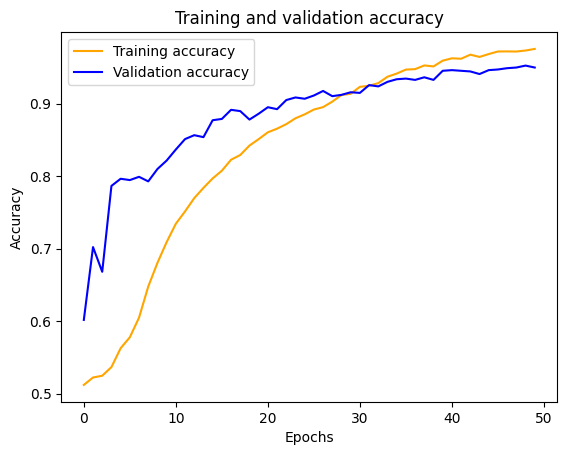

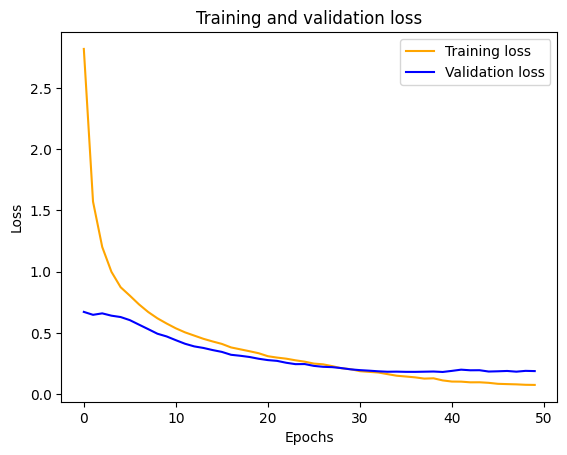

In [ ]:
# draw training history plots
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# accuracy plot
plt.plot(epochs, acc, 'orange', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# loss plot
plt.figure()
plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# predict
results = model.predict(X_test)
# confusion matrix
print(confusion_matrix(y_true=y_test,
                       y_pred=np.round(results,0)))
# classification report
print(classification_report(y_true=y_test,
                            y_pred=np.round(results,0)))
# f1 score
print(f1_score(y_true=y_test,
               y_pred=np.round(results,0)))
# Save the entire model as a `.keras` zip archive.
model.save('ffnn.keras')

35/35 [==============================] - 0s 2ms/step
[[979  26]
 [ 35  75]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1005
           1       0.74      0.68      0.71       110

    accuracy                           0.95      1115
   macro avg       0.85      0.83      0.84      1115
weighted avg       0.94      0.95      0.94      1115

0.7109004739336493
